# **Statistical Learning for Automation Systems**

       
## *Prof. Simone Formentin*

___

# K-Means Clustering with Python - Case Study

K-Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted and the algorithm just tries to find patterns in the data. 

In K-Means clustering, it is necessary to specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster and finds the centroid of each cluster. Then, the algorithm iterates through two steps:

* Re-assign data points to the cluster whose centroid is the closest;
* Calculate new centroid of each cluster.

These two steps are repeated until the within cluster variation cannot be reduced further. The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.

## Import Data Analysis and Visualization Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Dataset of Random Points

### Dataset Creation

In [2]:
data = np.random.rand(300,2)                    # Generate a dataset of 300 random points in a 2-dimensional space (uniformly picked in the interval [0,1])

In [3]:
data                                            # Show generated dataset

array([[0.84432724, 0.30767525],
       [0.03603198, 0.10611846],
       [0.70291562, 0.68334006],
       [0.04796484, 0.57480926],
       [0.41238923, 0.85316123],
       [0.4427967 , 0.79547349],
       [0.99434605, 0.79736056],
       [0.67139931, 0.34780332],
       [0.40686997, 0.6892896 ],
       [0.42278403, 0.72441308],
       [0.11445733, 0.7702171 ],
       [0.93753152, 0.60102639],
       [0.80541243, 0.65170555],
       [0.63434939, 0.59488994],
       [0.02815353, 0.70690908],
       [0.90913733, 0.08884734],
       [0.55124108, 0.40216588],
       [0.86273102, 0.99090284],
       [0.72950481, 0.52744651],
       [0.23444258, 0.31561309],
       [0.55696647, 0.47211392],
       [0.6074925 , 0.88191015],
       [0.06363728, 0.03240675],
       [0.96311017, 0.1256601 ],
       [0.4265029 , 0.7425275 ],
       [0.49441808, 0.62636682],
       [0.3303606 , 0.51384992],
       [0.94505224, 0.59008234],
       [0.59951019, 0.36130887],
       [0.62619903, 0.5860064 ],
       [0.

In [4]:
data[:,0]                                  # Vector containing the first coordinate for each point in the dataset

array([0.84432724, 0.03603198, 0.70291562, 0.04796484, 0.41238923,
       0.4427967 , 0.99434605, 0.67139931, 0.40686997, 0.42278403,
       0.11445733, 0.93753152, 0.80541243, 0.63434939, 0.02815353,
       0.90913733, 0.55124108, 0.86273102, 0.72950481, 0.23444258,
       0.55696647, 0.6074925 , 0.06363728, 0.96311017, 0.4265029 ,
       0.49441808, 0.3303606 , 0.94505224, 0.59951019, 0.62619903,
       0.15556509, 0.38086423, 0.20652595, 0.39004308, 0.071754  ,
       0.67657323, 0.43481496, 0.60665526, 0.90211591, 0.30149434,
       0.94661342, 0.74896749, 0.62898571, 0.51224476, 0.34628039,
       0.49536241, 0.3294398 , 0.13274112, 0.59639282, 0.82170038,
       0.66572346, 0.70214818, 0.25613516, 0.55898718, 0.67044187,
       0.09146435, 0.7590941 , 0.73721168, 0.46416116, 0.81787198,
       0.7240062 , 0.08640229, 0.57750012, 0.52722652, 0.11023475,
       0.92652051, 0.81238173, 0.65611139, 0.55548982, 0.43931023,
       0.46573016, 0.71028219, 0.44132334, 0.52012849, 0.81119

In [5]:
data[:,1]                               # Vector containing the second coordinate for each point in the dataset

array([0.30767525, 0.10611846, 0.68334006, 0.57480926, 0.85316123,
       0.79547349, 0.79736056, 0.34780332, 0.6892896 , 0.72441308,
       0.7702171 , 0.60102639, 0.65170555, 0.59488994, 0.70690908,
       0.08884734, 0.40216588, 0.99090284, 0.52744651, 0.31561309,
       0.47211392, 0.88191015, 0.03240675, 0.1256601 , 0.7425275 ,
       0.62636682, 0.51384992, 0.59008234, 0.36130887, 0.5860064 ,
       0.95596643, 0.85104774, 0.37433021, 0.0982659 , 0.92051682,
       0.32541491, 0.83572529, 0.49747117, 0.69018588, 0.39698051,
       0.68607246, 0.03895544, 0.62144644, 0.58627235, 0.34884045,
       0.8472617 , 0.2046867 , 0.10156634, 0.54213585, 0.07000741,
       0.83576649, 0.37815272, 0.82252067, 0.31327171, 0.51388531,
       0.73847509, 0.3464327 , 0.60693877, 0.24777523, 0.80211504,
       0.46088435, 0.84559531, 0.56006031, 0.42059223, 0.13543507,
       0.49000983, 0.35621666, 0.52385248, 0.39430301, 0.51734112,
       0.46704072, 0.24232425, 0.26894975, 0.33171746, 0.13495

### Data Visualization

Plot the dataset points in the two-dimensional feature space.

Text(0.5, 1.0, 'Data Scatterplot')

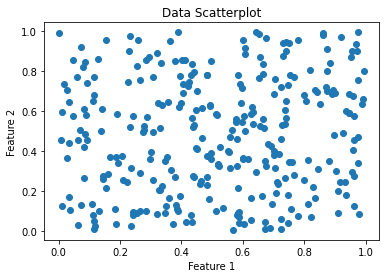

In [6]:
plt.scatter(data[:,0], data[:,1])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data Scatterplot')

### K-Means Clustering

In [7]:
from sklearn.cluster import KMeans                         # Import KMeans() method from Scikit Learn

In [8]:
kmeans = KMeans(n_clusters = 3)                            # Assign an instantiation of KMeans() to variable 'kmeans', specifying the number of clusters

In [9]:
kmeans.fit(data)                                           # Computation of K-Means Clustering applied to the dataset points

KMeans(n_clusters=3)

In [10]:
kmeans.cluster_centers_                                    # Plot the coordinates of the cluster centers in the two-dimensional feature space

array([[0.78049287, 0.65213253],
       [0.25459517, 0.68023946],
       [0.46845924, 0.19179533]])

In [11]:
kmeans.labels_                                             # Plot the label of the cluster each point is associated to after K-Means Clustering application

array([0, 2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 1, 2, 2, 0, 0, 2, 0, 0,
       2, 2, 1, 1, 1, 0, 2, 0, 1, 1, 1, 2, 1, 2, 1, 0, 0, 2, 0, 2, 0, 1,
       2, 1, 2, 2, 0, 2, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 0, 1, 0, 2, 2, 0,
       0, 0, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 1, 2, 2, 0, 0, 0,
       2, 1, 2, 0, 1, 0, 2, 1, 1, 0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 0, 1, 0,
       0, 2, 1, 2, 2, 2, 2, 0, 2, 1, 2, 1, 0, 1, 1, 1, 0, 2, 0, 2, 0, 1,
       1, 2, 2, 0, 0, 0, 0, 2, 0, 1, 1, 2, 2, 2, 2, 2, 1, 0, 2, 0, 1, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 1,
       0, 1, 0, 0, 2, 0, 2, 0, 2, 2, 1, 2, 2, 0, 2, 1, 0, 2, 0, 2, 1, 2,
       2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2, 1, 2, 1, 1, 1, 0,
       2, 2, 2, 2, 0, 1, 0, 1, 2, 0, 2, 0, 2, 1, 0, 0, 2, 0, 2, 0, 1, 1,
       1, 1, 0, 1, 1, 2, 1, 0, 1, 0, 0, 0, 0, 2, 2, 0, 1, 1, 2, 1, 0, 2,
       2, 1, 2, 2, 2, 0, 2, 2, 2, 1, 2, 0, 2, 1, 1, 1, 2, 2, 2, 1, 0, 2,
       0, 2, 2, 1, 0, 2, 2, 0, 0, 2, 2, 1, 1, 2])

### Plot Original Dataset vs K-Means Clustering Results

Text(0, 0.5, 'Feature 2')

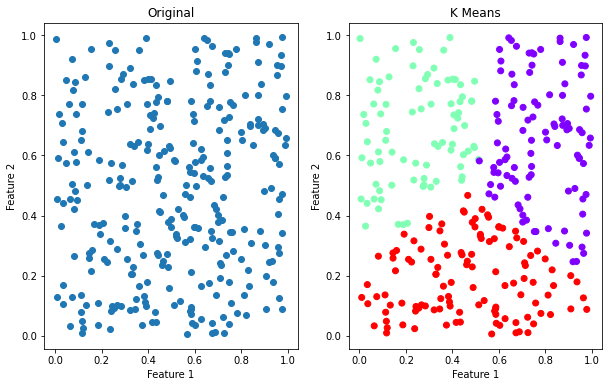

In [12]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))

ax1.scatter(data[:,0], data[:,1])
ax1.set_title("Original")
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')

ax2.scatter(data[:,0], data[:,1], c = kmeans.labels_, cmap = 'rainbow')
ax2.set_title('K Means')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')

## Create Dataset using make_blobs() function

### Dataset Creation

In [13]:
from sklearn.datasets import make_blobs                              # Import make_blobs() function from sklearn

# Create Data
data_mb = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.8, random_state=101)

In [14]:
data_mb                                                                 # Show data

(array([[-6.42884095e+00,  1.01411174e+01],
        [ 5.86867888e+00,  5.20110356e+00],
        [-3.76109375e-01,  3.26427943e+00],
        [ 2.16679181e+00,  9.56300522e+00],
        [ 5.09508570e+00,  7.20752718e+00],
        [-1.08788882e+01, -6.11318040e+00],
        [ 2.03405554e+00,  9.76664755e+00],
        [-1.71798771e+00,  1.41401140e+00],
        [ 1.16911341e+00,  8.24556988e+00],
        [-1.35185444e+00,  3.13245345e+00],
        [-6.18548214e+00,  9.67406555e+00],
        [-1.19856602e+00,  2.50408937e+00],
        [ 2.90296863e+00,  7.91251003e+00],
        [ 2.39250023e+00,  5.38173971e+00],
        [-5.27545147e+00,  9.63836659e+00],
        [-5.66814687e-01,  5.60262755e-02],
        [ 5.97336628e+00,  5.87172022e+00],
        [-2.31355268e+00,  5.23980092e-01],
        [-1.01344756e+01, -3.43130837e+00],
        [-4.54082629e+00,  1.13920174e+01],
        [-1.04155833e+01, -5.67545836e+00],
        [ 6.64796693e-01,  9.42304718e-02],
        [ 2.11460477e+00,  3.559

In [15]:
data_mb[0]               # 2-dimensional array containing the coordinates for each generated point in the 2D feature space

array([[-6.42884095e+00,  1.01411174e+01],
       [ 5.86867888e+00,  5.20110356e+00],
       [-3.76109375e-01,  3.26427943e+00],
       [ 2.16679181e+00,  9.56300522e+00],
       [ 5.09508570e+00,  7.20752718e+00],
       [-1.08788882e+01, -6.11318040e+00],
       [ 2.03405554e+00,  9.76664755e+00],
       [-1.71798771e+00,  1.41401140e+00],
       [ 1.16911341e+00,  8.24556988e+00],
       [-1.35185444e+00,  3.13245345e+00],
       [-6.18548214e+00,  9.67406555e+00],
       [-1.19856602e+00,  2.50408937e+00],
       [ 2.90296863e+00,  7.91251003e+00],
       [ 2.39250023e+00,  5.38173971e+00],
       [-5.27545147e+00,  9.63836659e+00],
       [-5.66814687e-01,  5.60262755e-02],
       [ 5.97336628e+00,  5.87172022e+00],
       [-2.31355268e+00,  5.23980092e-01],
       [-1.01344756e+01, -3.43130837e+00],
       [-4.54082629e+00,  1.13920174e+01],
       [-1.04155833e+01, -5.67545836e+00],
       [ 6.64796693e-01,  9.42304718e-02],
       [ 2.11460477e+00,  3.55938488e+00],
       [-1.

In [16]:
data_mb[1]               # 1-dimensional array containing the label (cluster) associated to each generated point

array([3, 2, 0, 2, 2, 1, 2, 0, 2, 0, 3, 0, 2, 2, 3, 0, 2, 0, 1, 3, 1, 0,
       0, 1, 3, 1, 1, 0, 2, 2, 3, 1, 2, 0, 0, 3, 1, 1, 1, 2, 1, 3, 3, 3,
       0, 3, 3, 0, 1, 2, 0, 3, 2, 0, 1, 3, 0, 0, 3, 2, 1, 2, 1, 3, 2, 0,
       1, 2, 2, 1, 2, 0, 1, 3, 1, 2, 2, 0, 3, 0, 0, 1, 2, 1, 0, 0, 0, 3,
       2, 1, 1, 1, 1, 3, 0, 1, 2, 3, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 1,
       0, 3, 3, 2, 1, 2, 3, 3, 2, 3, 0, 3, 0, 3, 0, 2, 3, 0, 1, 3, 3, 3,
       0, 1, 1, 3, 2, 3, 2, 0, 1, 2, 1, 3, 3, 2, 0, 1, 3, 3, 3, 3, 0, 2,
       0, 3, 2, 2, 2, 0, 2, 0, 0, 3, 1, 3, 0, 2, 3, 0, 2, 0, 3, 3, 0, 3,
       2, 2, 1, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 1, 2, 2, 3, 1, 0, 2, 2,
       1, 0])

### Data Visualization

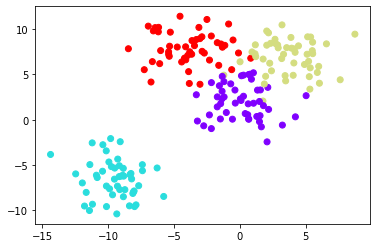

In [17]:
plt.scatter(data_mb[0][:,0],data_mb[0][:,1],c=data_mb[1],cmap='rainbow')         # Data scatterplot in the 2-dimensional feature space

### K-Means Clustering

In [18]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)

In [19]:
kmeans.fit(data_mb[0])

KMeans(n_clusters=4)

In [20]:
kmeans.cluster_centers_

array([[-4.13591321,  7.95389851],
       [-9.46941837, -6.56081545],
       [-0.0123077 ,  2.13407664],
       [ 3.71749226,  7.01388735]])

In [21]:
kmeans.labels_

array([0, 3, 2, 3, 3, 1, 3, 2, 3, 2, 0, 2, 3, 3, 0, 2, 3, 2, 1, 0, 1, 2,
       2, 1, 0, 1, 1, 2, 3, 3, 0, 1, 3, 2, 2, 0, 1, 1, 1, 2, 1, 0, 0, 0,
       2, 3, 0, 2, 1, 2, 2, 0, 3, 2, 1, 0, 2, 2, 0, 3, 1, 3, 1, 0, 3, 2,
       1, 3, 3, 1, 3, 2, 1, 2, 1, 3, 3, 2, 0, 2, 2, 1, 3, 1, 2, 2, 2, 0,
       2, 1, 1, 1, 1, 2, 2, 1, 3, 0, 1, 3, 2, 1, 2, 2, 3, 2, 1, 3, 1, 1,
       3, 0, 0, 3, 1, 3, 0, 0, 3, 0, 2, 0, 2, 0, 2, 3, 0, 2, 1, 0, 0, 0,
       2, 1, 1, 0, 3, 0, 3, 2, 1, 3, 1, 0, 0, 3, 2, 1, 0, 0, 0, 0, 2, 3,
       2, 0, 3, 3, 3, 2, 3, 2, 2, 0, 1, 0, 2, 3, 0, 2, 3, 2, 0, 3, 2, 0,
       3, 3, 1, 3, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 3, 3, 0, 1, 2, 3, 3,
       1, 2])

### Plot Original Dataset vs K-Means Clustering Results

Text(0, 0.5, 'Feature 2')

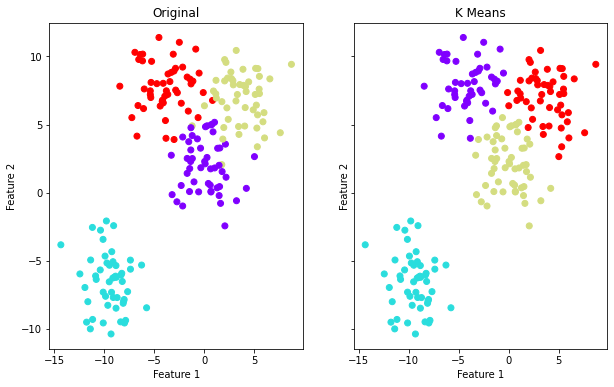

In [22]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))

ax1.scatter(data_mb[0][:,0],data_mb[0][:,1],c=data_mb[1],cmap='rainbow')
ax1.set_title("Original")
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')

ax2.scatter(data_mb[0][:,0],data_mb[0][:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title('K Means')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')

Observation: The colors are meaningless in reference between the two plots.

## Conclusion

The proposed case study represents an example of application of K-Means Clustering algorithm to a randomly generated dataset in a two-dimensional feature space. It may be interesting to repeat the analysis on different datasets, specifying different numbers of clusters.